# サポートベクトルマシン

In [2]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [3]:
moons = make_moons(n_samples=200, noise=0.1, random_state=0)
moons

(array([[ 7.92357355e-01,  5.02648573e-01],
        [ 1.63158315e+00, -4.63896705e-01],
        [-6.71092674e-02,  2.67767057e-01],
        [-1.04412427e+00, -1.82607610e-01],
        [ 1.76704822e+00, -1.98609868e-01],
        [ 1.90607398e+00, -7.10915927e-02],
        [ 9.62192129e-01,  2.61986075e-01],
        [ 8.86813848e-01, -4.84896235e-01],
        [ 8.68935196e-01,  3.61092776e-01],
        [ 1.15352953e+00, -5.72352929e-01],
        [-3.70714493e-01,  7.21655833e-01],
        [ 1.95523229e-01, -2.64439358e-01],
        [ 1.80949658e+00, -1.94707885e-01],
        [ 1.29046617e+00, -3.23893778e-01],
        [-8.23662620e-01,  7.17643700e-01],
        [ 9.85881879e-01,  1.96706218e-01],
        [ 5.81943503e-01,  9.06311048e-01],
        [ 2.76118902e-01, -2.87451069e-01],
        [ 3.17284813e-01,  8.54200996e-01],
        [-8.52697952e-01,  9.32383274e-01],
        [ 1.97796688e+00,  1.04796611e-02],
        [ 8.64249290e-01, -4.63242870e-01],
        [ 2.57499053e-01,  1.003

In [4]:
x = moons[0] # data [:,2]
y = moons[1] # label
print(x.shape)

(200, 2)


[]

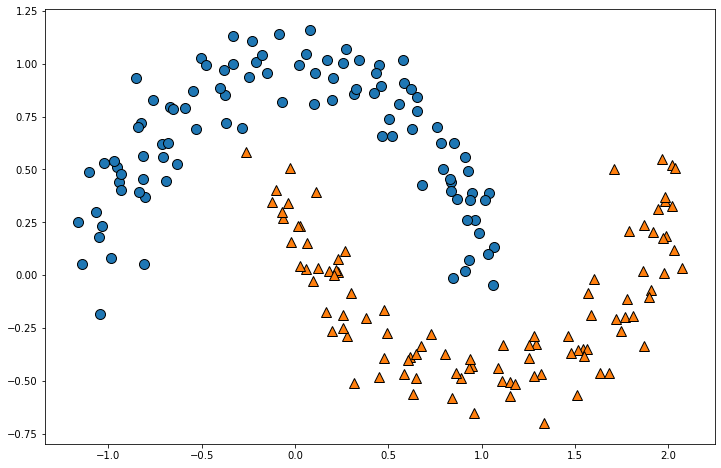

In [5]:
plt.figure(figsize=(12, 8))
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.plot()

## まずは線形分離で試してみる。。絶対できないけどあえて確認

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC  # 線形SVC

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=0)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

## やっぱ分類できないよね

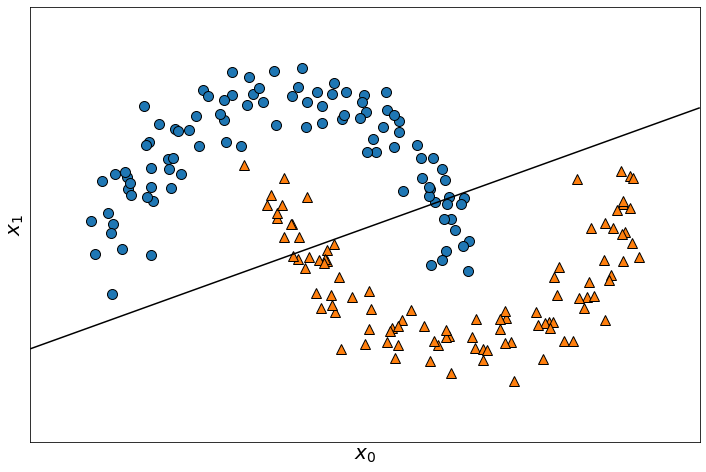

In [8]:
lin_svm = LinearSVC().fit(x_train_scaled, y_train)

plt.figure(figsize=(12, 8))
mglearn.plots.plot_2d_separator(lin_svm, x)
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20)
plt.show()

## 高次元特徴空間へ写像してから線形分離してみる

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree=3) # 3次元
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

print(x_train_poly.shape)
print(x_train_poly)

(150, 10)
[[ 1.00000000e+00  8.86813848e-01 -4.84896235e-01 ... -3.81341214e-01
   2.08511538e-01 -1.14010917e-01]
 [ 1.00000000e+00  9.24799914e-01  4.94247065e-01 ...  4.22707215e-01
   2.25910272e-01  1.20734753e-01]
 [ 1.00000000e+00 -7.63797985e-01  8.26528213e-01 ...  4.82186114e-01
  -5.21787743e-01  5.64641828e-01]
 ...
 [ 1.00000000e+00 -9.68196502e-01  5.38851311e-01 ...  5.05121626e-01
  -2.81126249e-01  1.56461263e-01]
 [ 1.00000000e+00 -6.70964946e-01  7.93803059e-01 ...  3.57365342e-01
  -4.22790644e-01  5.00193800e-01]
 [ 1.00000000e+00 -2.68526403e-02  5.04722011e-01 ...  3.63937020e-04
  -6.84055729e-03  1.28575060e-01]]


In [11]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3']

## うまく分離できた！！

In [12]:
x_train_poly_scaled = scaler.fit_transform(x_train_poly)
x_test_poly_scaled = scaler.fit_transform(x_test_poly)

lin_svm = LinearSVC().fit(x_train_poly_scaled, y_train)
lin_svm.predict(x_test_poly_scaled) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## pipelineを使ってもう少し簡単に書いてみる

In [13]:
from sklearn.pipeline import Pipeline

poly_svm = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm', LinearSVC())
])
poly_svm.fit(x, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('svm', LinearSVC())])

## 決定関数を散布図を描画する関数を定義

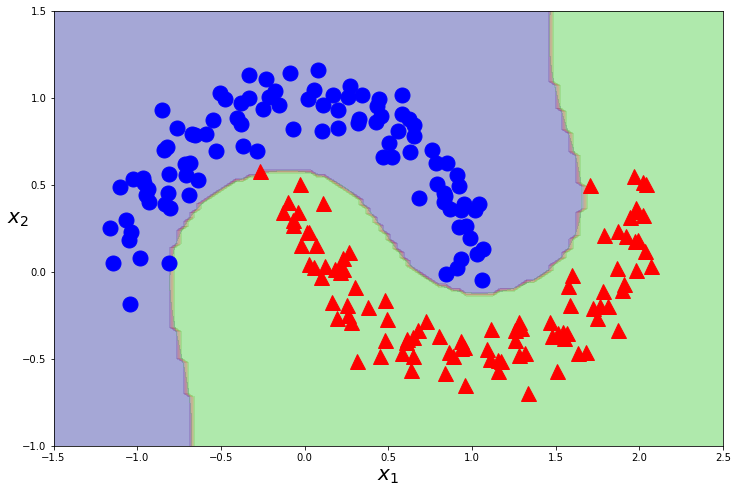

In [15]:
def plot_decision_function(model):
    _x0 = np.linspace(-1.5, 2.5, 100)
    _x1 = np.linspace(-1.0, 1.5, 100)
    x0, x1 = np.meshgrid(_x0, _x1)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(x).reshape(x0.shape)
    y_decision = model.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, levels=[y_decision.min(), 0, y_decision.max()], alpha=0.3)
    
def plot_dataset(x, y):
    plt.plot(x[:,0][y==0], x[:,1][y==0], 'bo', ms=15)
    plt.plot(x[:,0][y==1], x[:,1][y==1], 'r^', ms=15)
    plt.xlabel('$x_1$', fontsize=20)
    plt.ylabel('$x_2$', fontsize=20, rotation=0)
    
plt.figure(figsize=(12, 8))
plot_decision_function(poly_svm)
plot_dataset(x, y)
plt.show()

## カーネル法 こっちの方がより効率的に行える

In [16]:
from sklearn.svm import SVC

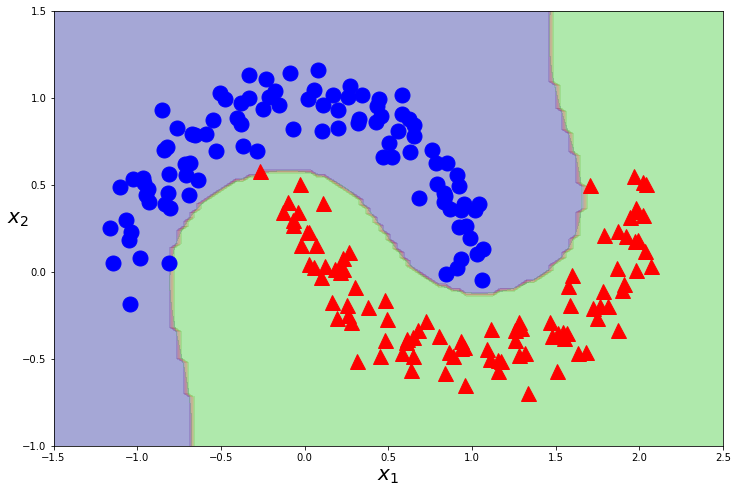

In [25]:
kernel_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', degree=3, coef0=1))
])

kernel_svm.fit(x, y)

plt.figure(figsize=(12, 8))
plot_decision_function(poly_svm)
plot_dataset(x, y)
plt.show()

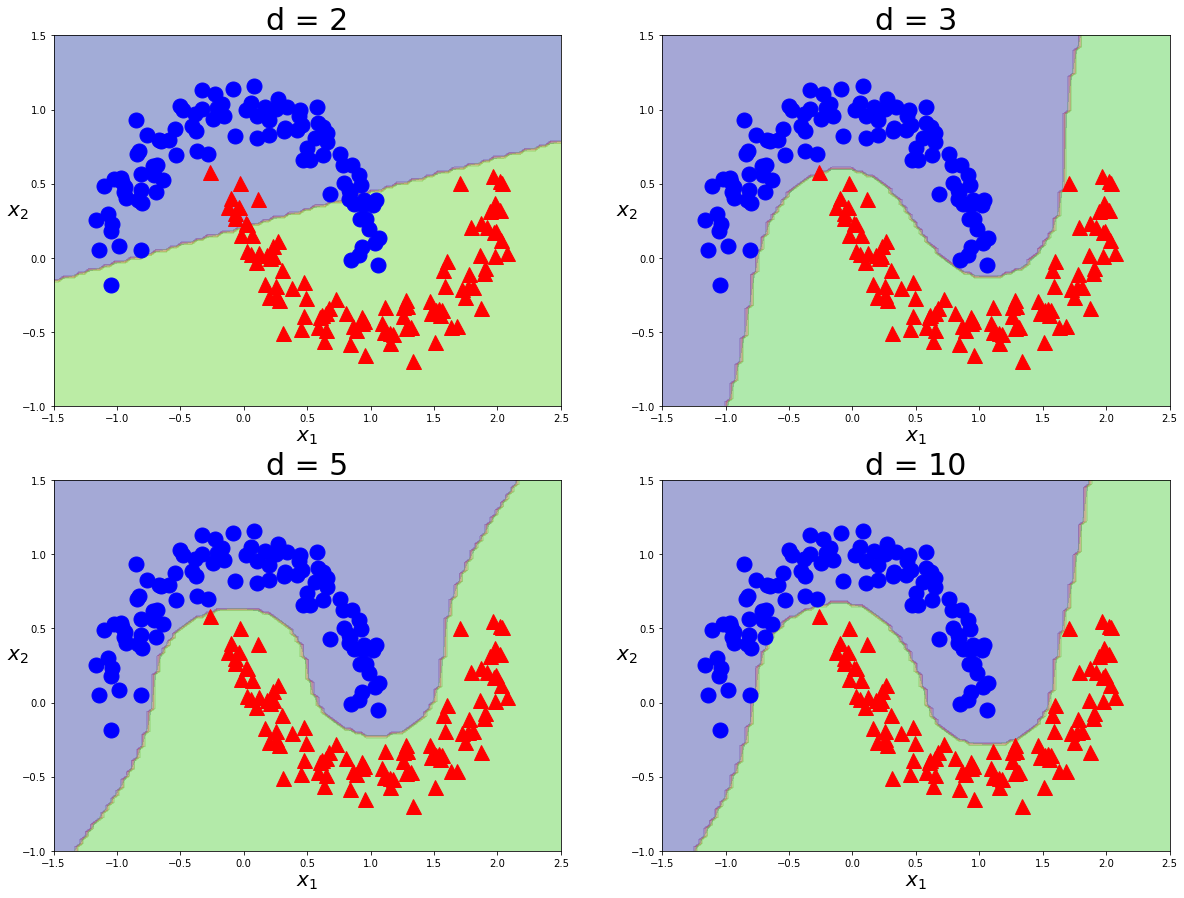

In [20]:
plt.figure(figsize=(20, 15))

for i, degree in enumerate([2, 3, 5, 10]):
    poly_kernel_svm = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='poly', degree=degree, coef0=1))
    ])
    poly_kernel_svm.fit(x, y)
    
    plt.subplot(221 + i)
    plot_decision_function(poly_kernel_svm)
    plot_dataset(x, y)
    plt.title('d = {}'.format(degree), fontsize=30)
    
plt.show()